#  Chọn mẫu ngẫu nhiên lặp lại

## BS. Lê Ngọc Khả Nhi

Đây là bài thực hành đầu tiên nằm trong Series lập trình thống kê Python nâng cao. Gọi là nâng cao vì nó đòi hỏi một số kỹ năng viết code nhất định, nhưng nội dung sẽ không quá phức tạp. Trong bài này, Nhi sẽ hướng dẫn các bạn thực hiện một quy trình chọn mẫu ngẫu nhiên lặp lại (hay Bootstrap). Mục tiêu của bootstrap là ước lượng phân bố của một hay nhiều trị số thống kê từ dữ liệu.

Bạn có thể làm bootstrap cho mọi thứ, từ các chỉ số thống kê mô tả (trung bình, trung vị) cho đến  hệ số tương quan Pearson, Odds-ratio, điểm số phẩm chất mô hình (Recall, Accuracy, F1 score, Kappa...), AUC của ROC curve...

Một quy trình bootstrap thường có cấu trúc như sau:

(1) Đầu tiên, ta cần chuẩn bị một place-holder để thu nhận kết quả sinh ra từ vòng lặp tái chọn mẫu. Placeholder là 1 data object, có cấu trúc tùy theo nhu cầu về kết quả mà ta mong muốn. Ta có thể dùng list, dictionary, numpy array hoặc pandas dataframes.

(2) Pseudo-random value generator: Một cơ chế để sinh ra giá trị ngẫu nhiên; thông thường ta dùng các method random của python hay của module numpy.random, thí dụ randint hay random.choice, để thực hiện việc chọn mẫu ngẫu nhiên.

(3) Quy trình (hàm) để ước tính một hay nhiều giá trị mà ta mong muốn trên mẫu dữ liệu sinh ra từ (2) 

(4) Một vòng lặp, để lặp lại N lần bước (2) và (3), và mỗi lần như vậy gán dữ liệu từ (3) vào place holder (1)

In [6]:
import numpy as np
import pandas as pd
from scipy import integrate
from sklearn.metrics import auc

import matplotlib
import matplotlib.pyplot as plt
import arviz as az

Thí dụ, ta có một bài toán giả định như sau:

Cho spo2 là chuỗi giá trị của độ bão hòa oxy máu (SPO2) ghi nhận trong 180 phút với tần số lấy mẫu 1 lần/phút

Mục tiêu: Ước tính giá trị trung bình của SPO2 trong mỗi 10 phút

In [7]:
spo2 = np.random.randint(low = 92, high = 97, size = 180)

spo2

array([94, 96, 95, 96, 94, 96, 95, 92, 96, 96, 95, 96, 96, 92, 95, 94, 95,
       92, 93, 92, 93, 95, 95, 93, 95, 93, 95, 96, 94, 94, 96, 95, 94, 93,
       96, 93, 95, 96, 94, 93, 94, 92, 93, 92, 95, 94, 94, 93, 94, 92, 95,
       92, 95, 96, 95, 94, 92, 93, 93, 96, 94, 94, 92, 92, 95, 94, 92, 94,
       96, 92, 94, 96, 95, 96, 92, 93, 92, 95, 92, 94, 92, 92, 94, 92, 93,
       94, 95, 96, 94, 94, 93, 92, 92, 93, 94, 96, 92, 94, 96, 95, 94, 96,
       92, 94, 95, 93, 95, 96, 94, 95, 92, 95, 93, 94, 96, 94, 94, 92, 92,
       96, 94, 92, 93, 93, 95, 92, 92, 95, 92, 92, 94, 92, 96, 96, 95, 92,
       94, 93, 93, 94, 96, 93, 92, 93, 94, 93, 93, 92, 92, 94, 94, 96, 96,
       92, 92, 93, 92, 96, 95, 93, 94, 92, 96, 92, 93, 94, 94, 92, 95, 95,
       96, 95, 93, 95, 96, 96, 94, 92, 96, 95])

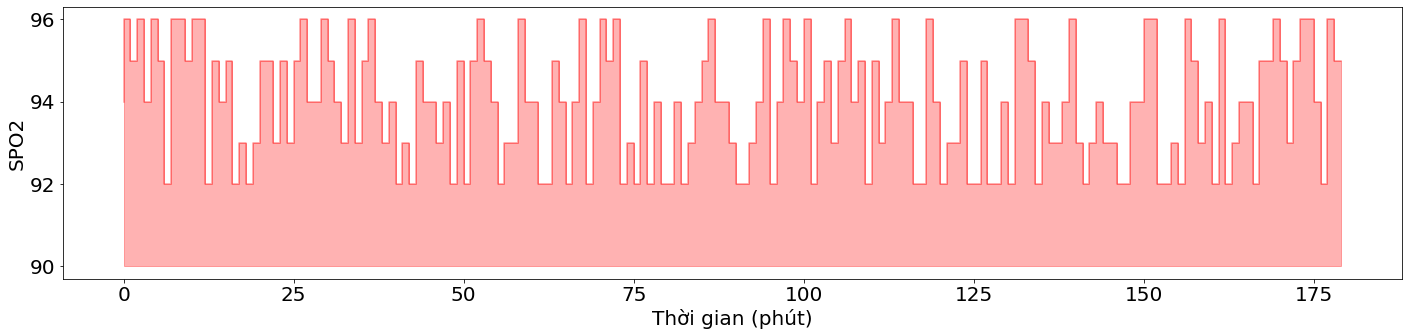

In [13]:
matplotlib.rcParams.update({'font.size': 20})
plt.figure(figsize=(24,5))

plt.fill_between(np.arange(spo2.shape[0]),
                 np.repeat(90, spo2.shape[0]),
                 spo2, 
                 step="pre", 
                 alpha=0.3, 
                 color = 'red')
plt.xlabel('Thời gian (phút)')
plt.ylabel('SPO2')

plt.plot(np.arange(spo2.shape[0]),spo2, drawstyle="steps", color = 'red', alpha = 0.4)

Trong không gian chọn mẫu spo2, mỗi  đơn vị quan sát tương ứng với 1 phút. Nếu ta không quan tâm đến trình tự thời gian, chỉ cần ta chọn ngẫu nhiên 10 đơn vị quan sát rồi lấy trung bình, và lặp lại rất nhiều lần, ta có thể trả lời được câu hỏi mục tiêu.

Nhi viết 1 hàm boot_mean để thực hiện quy trình này:

1) sampl là place holder, nó là 1 numpy array rỗng

2) Cơ chế chọn mẫu ngẫu nhiên là method np.random.choice với size = 10 (10 phút)

3) Giá trị cần tính là trung bình, dùng method np.mean

4) Vòng lặp for lặp lại N lần

In [15]:
def boot_mean(seq = None, n_iter = 100, window_size = 10):
    
    sampl = np.array([]) # place holder
    
    for i in range(n_iter):
        s_mean = np.mean(np.random.choice(seq, replace = True, 
                                          size = window_size)
                        )
        sampl = np.append(sampl, s_mean)
    
    return sampl

Thi hành hàm boot_mean với số lượt lấy mẫu là 10 ngàn, và lưu kết quả vào array mean_spo2:

In [16]:
mean_spo2 = boot_mean(spo2, 10000)

10 giá trị đầu tiên của kết quả thu được:

In [17]:
mean_spo2[:10]

array([94.8, 93.4, 93.5, 93.6, 94.2, 94.1, 95.1, 93.5, 94. , 94. ])

Bây giờ, ta có thể dùng thống kê mô tả để khảo sát 10000 kết quả thu được:

Text(0.5, 1.0, '')

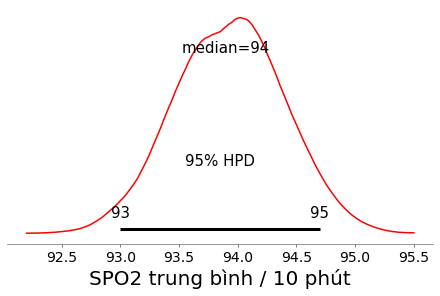

In [20]:
az.plot_posterior(mean_spo2,
                  credible_interval = 0.95,
                  point_estimate = 'median',
                  kind = 'kde',
                  color ="red")

plt.xlabel('SPO2 trung bình / 10 phút')
plt.title(None)

Tuy nhiên, một số bạn có thể không hài lòng với cách làm này, với lập luận rằng: Spo2 là 1 chuỗi thời gian nên khi chọn mẫu ta cần đảm bảo tính liên tục theo trình tự thời gian, tức là ta phải chọn ngẫu nhiên những phân đoạn 10 giá trị liên tục chứ không phải lấy 10 điểm rải rác tại các thời điểm xa nhau.

Ta có thể làm việc này 1 cách dễ dàng như sau:

Dùng method numpy.random.randint để sinh ra ngẫu nhiên 10000 con số trong khoảng từ 0 đến 180, xem đây là điểm khởi đầu của phân đoạn ta cần lấy mẫu, cộng thêm 10 là ta có được điểm kết thúc. Dùng 1 cặp khởi đầu và kết thúc như indices array, ta có thể trích ra được phân đoạn 10 phút liên tục.

Có một vấn đề nhỏ: nếu điểm kết thúc vượt quá giới hạn 180 thì sao ? Ta chỉ cần sửa bằng cách lùi điểm khởi đầu lại 10 vị trí, như vậy ta không bao giờ lấy mẫu vượt quá giới hạn độ dài của chuỗi spo2.

Tiếp theo, ta có thể làm phức tạp hơn 1 chút: nếu ta muốn khảo sát kết quả trên toàn bộ thang đo của SpO2 (bao gồm giá trị min, max và toàn bộ các giá trị có thể giữa 2 mức này của spO2) nhưng kết quả lại không chứa các giá trị này thì sao ? Ta chỉ cần chuẩn bị place holder chứa sẵn thang đo cơ bản này, lưu ý là mỗi mốc trên thang đo chỉ xuất hiện với tần suất 1 lần, nên không có ảnh hưởng gì nhiều trên phân phối 10000 quan sát.

Ta lại phức tạp vấn đề thêm 1 chút nữa: Nếu như ta không chỉ đơn giản muốn tính trung bình cộng của 10 giá trị như trên, nhưng muốn dùng trung bình tích phân (tức là tính diện tích dưới đường cong SpO2 trong phân đoạn t=10 với dt = 1, rồi chia cho t-1)

Ta xây dựng 1 hàm cho phép làm tất cả việc trên:

In [29]:
def boot_auc(seq = None, n_iter = 100, window_size = 10, full_scale = True):
    
    def sample_sequence(seq = None, n_iter = 100, window_size = 10):
        np.random.seed(123)
        start_loc = np.random.randint(0, seq.shape[0], size = n_iter)
        start_loc -= window_size*(start_loc > (seq.shape[0] - window_size))
        return start_loc
    
    if full_scale:
        auc_array = np.linspace(np.min(seq), np.max(seq), 10)
    else:
        auc_array = np.array([])
    
    locs = sample_sequence(seq, n_iter, window_size)
    
    for i in locs:
        auc_array = np.append(auc_array,
                              np.trapz(seq[i:i+10], dx = 1)/(window_size - 1))
    return auc_array

Hàm này xuất ra chuỗi giá trị trung bình tích phân SpO2 của các phân đoạn 10 phút:

In [30]:
auc_seqs = boot_auc(seq = spo2, 
                    n_iter = 10000, 
                    window_size = 10, 
                    full_scale = True)

Text(0.5, 1.0, '')

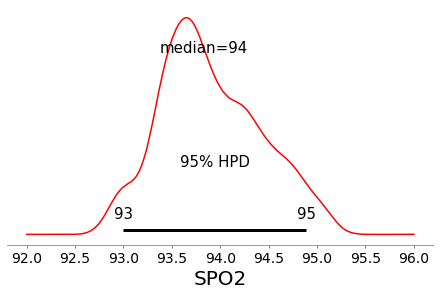

In [32]:
az.plot_posterior(auc_seqs,
                  credible_interval = 0.95,
                  point_estimate = 'median',
                  kind = 'kde',
                  color ="red")

plt.xlabel('SPO2')
plt.title(None)

Bài thực hành đến đây tạm dừng, các bạn đã hình dung ra được cấu trúc Python code của một quy trình bootstrap; dựa vào cấu trúc này các bạn có thể áp dụng bootstrap cho mọi vấn đề khác từ đơn giản đến phức tạp. Thí dụ nếu cần xuất ra nhiều giá trị, chỉ cần tạo place holder là dictionary , array đa chiều hay pandas dataframe. Nếu giá trị cần tính là phức tạp, chỉ cần viết hàm cho từng công đoạn nhỏ rồi ghép lại trong vòng lặp.

Chúc các bạn thực hành vui và vận dụng thành công Python cho vấn đề của mình.